In [1]:
import cv2
import pytesseract
import os
import matplotlib.pyplot as plt
import re
from datetime import datetime
import spacy

In [2]:
def clean_text(text):
    cleaned_text = re.sub(r'\s+', ' ', text).strip()
    return cleaned_text

In [3]:
def extract_information(text):
    cleaned_text = clean_text(text)
    info = {}

    # Regex patterns for different pieces of information
    patterns = {
        'name': r'Name:\s*(.*)',
        'dob': r'Date of Birth:\s*(\d{2}/\d{2}/\d{4})',
        'passport_number': r'Passport Number:\s*(\d+)'
    }

    for key, pattern in patterns.items():
        match = re.search(pattern, cleaned_text)
        if match:
            info[key] = match.group(1)
    
    return info

In [4]:
def validate_info(info):
    info = extract_information(info)
    try:
        # Validate Date of Birth
        dob = datetime.strptime(info.get('dob', ''), '%d/%m/%Y')
        if not info.get('name') or not info.get('passport_number'):
            return False, info
        return True, info
    except ValueError:
        return False, info

In [5]:
def extraction_final_validation(text):
    flag, data = validate_info(text)
    
    if validate_info(flag):
        print("Information successfully extracted and validated:")
        print(f"Name: {data['name']}")
        print(f"Date of Birth: {data['dob']}")
        print(f"Passport Number: {data['passport_number']}")
    else:
        print("Invalid information extracted.")

In [6]:
def extract_info_ner(text):
    nlp = spacy.load('en_core_web_sm')
    text = clean_text(text)
    doc = nlp(text)
    info = {}

    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            info['name'] = ent.text
        elif ent.label_ == 'DATE':
            info['dob'] = ent.text
        elif ent.label_ == 'CARDINAL':  # For things like passport numbers
            info['passport_number'] = ent.text
    
    return info

In [7]:
def process_images(input_folder):
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(input_folder, filename)
            image = cv2.imread(filepath)
            text = pytesseract.image_to_string(image)
            extracted_text = extract_info_ner(text)
            if text is not None:
                print(filename)
                plt.imshow(image)
                plt.show()
                print(extracted_text)
            else:
                None

p27.jpeg


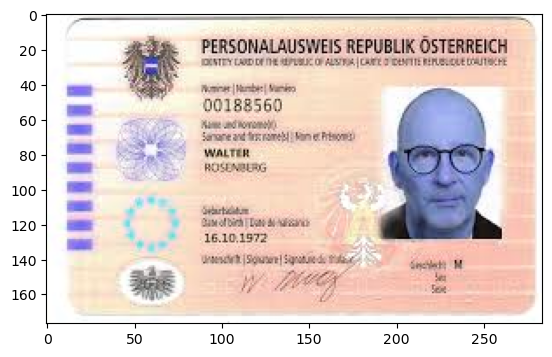

{}
p26.jpeg


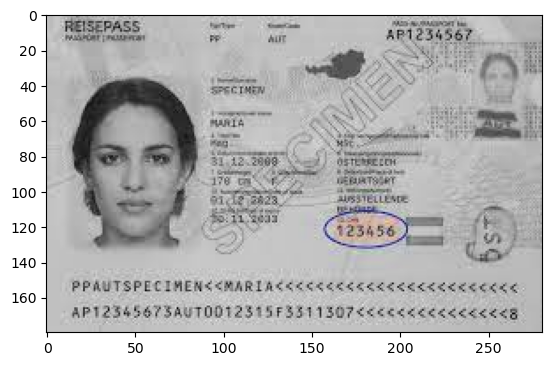

{'passport_number': '1307'}
p30.jpeg


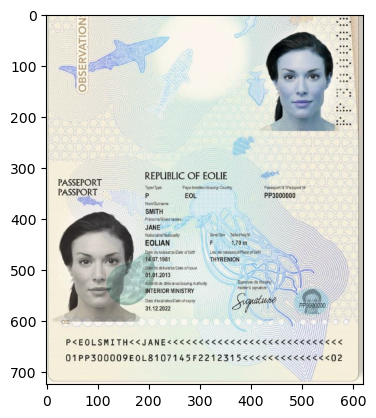

{'name': 'erica'}
p17.jpeg


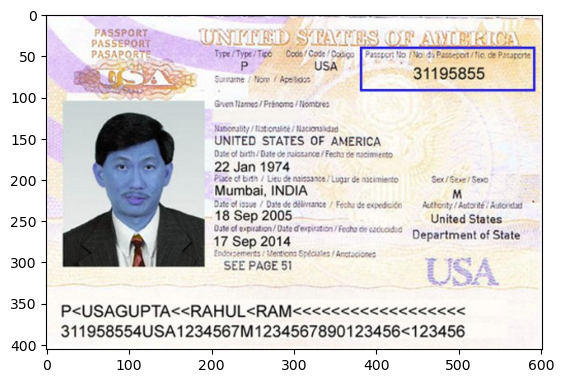

{'passport_number': '51'}
p16.jpeg


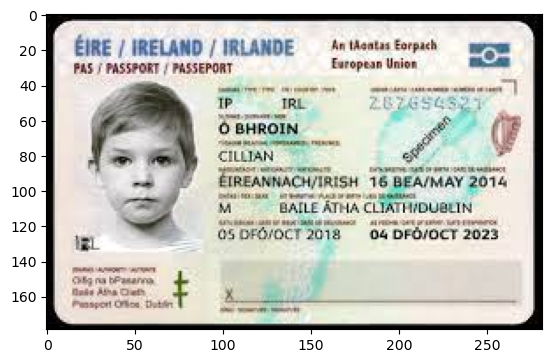

{'dob': '76'}
p23.jpeg


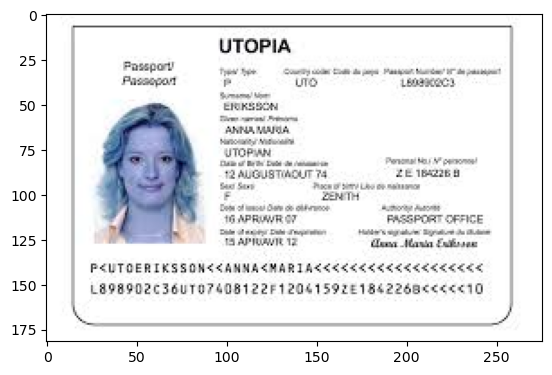

{}
p2.jpg


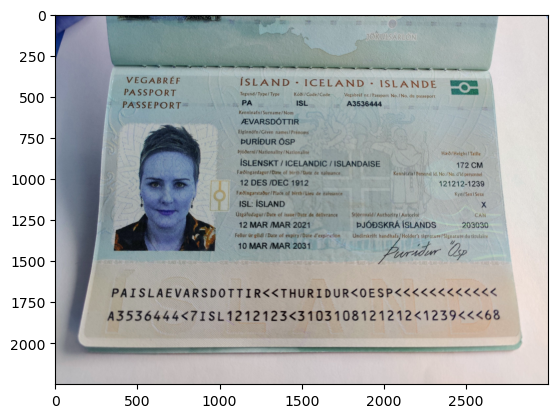

{'name': 'Fadingardagor', 'passport_number': '9h', 'dob': '121212-1239'}
p15.jpeg


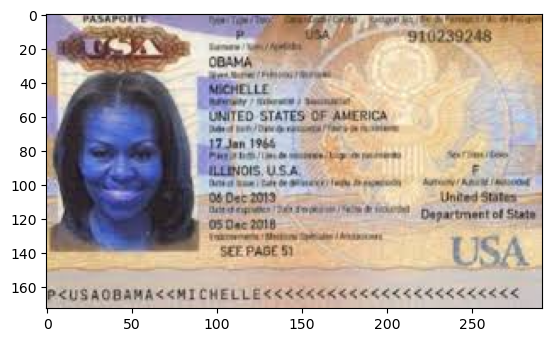

{}
p3.jpeg


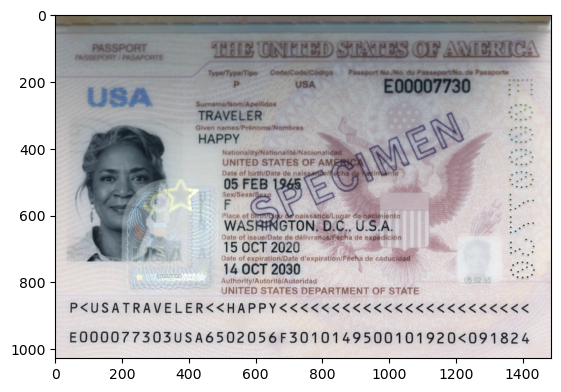

{'passport_number': '15', 'name': 'y7%'}
p1.jpg


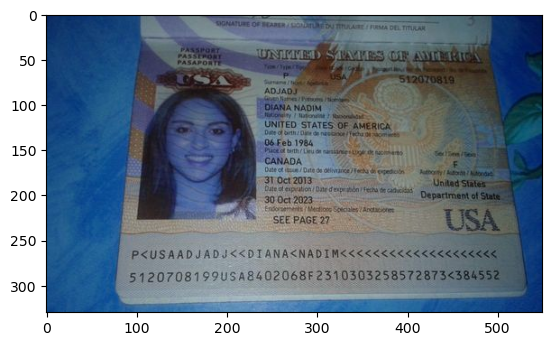

{}
p14.jpeg


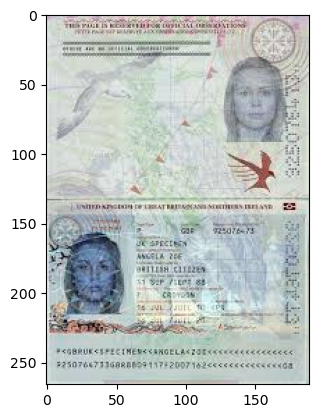

{}
p6.jpg


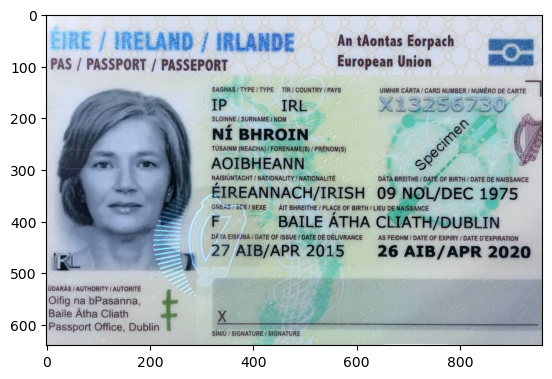

{'passport_number': '26'}
p33.jpg


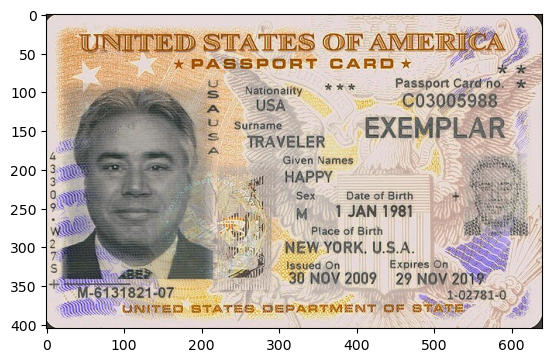

{'passport_number': '30'}
p32.jpg


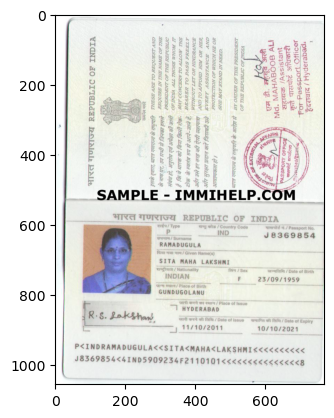

{'passport_number': '2h', 'name': 'J8369854 wy'}
p29.jpeg


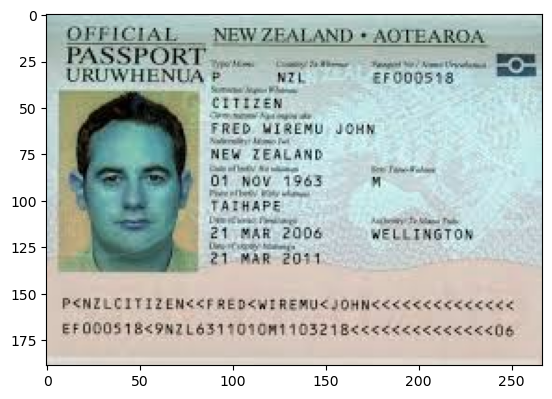

{'name': 'Hoos Bm', 'dob': '1032'}
p18.png


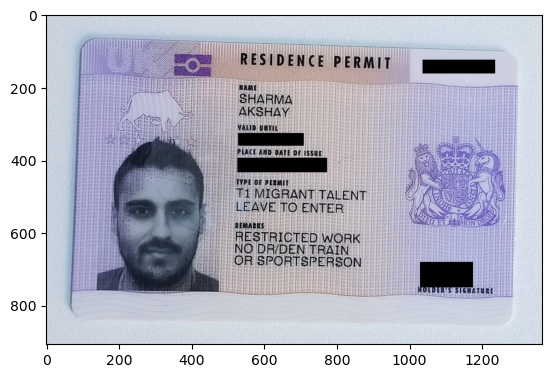

{'passport_number': '2a'}
p19.png


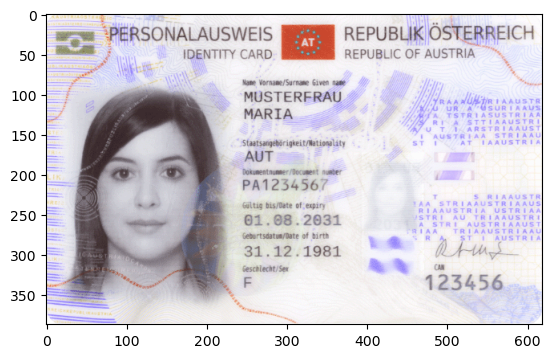

{'name': 'AUSTRIA', 'passport_number': '80', 'dob': '123456'}
p25.jpeg


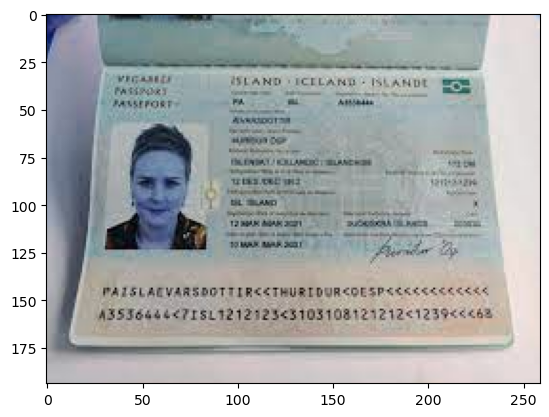

{}
p24.jpeg


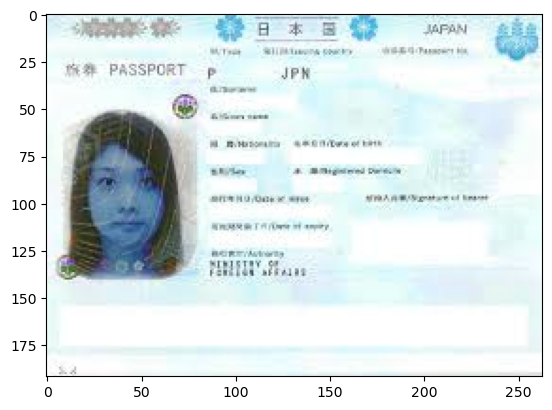

{}
p21.jpg


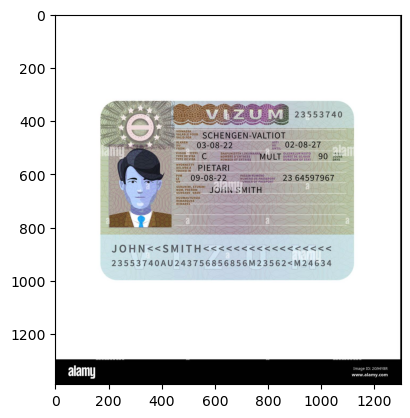

{'passport_number': '2G94Y8R', 'name': 'Benet JOHN_SMITH'}
p20.jpg


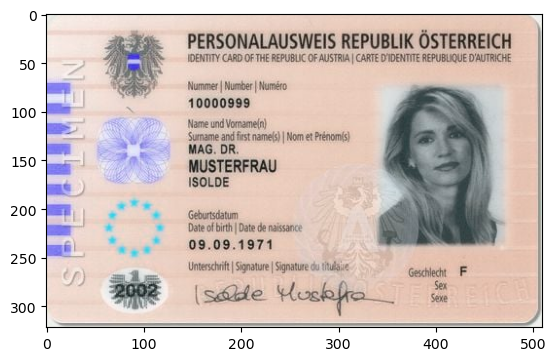

{'name': 'Husk', 'passport_number': '886', 'dob': '2502'}
p34.jpg


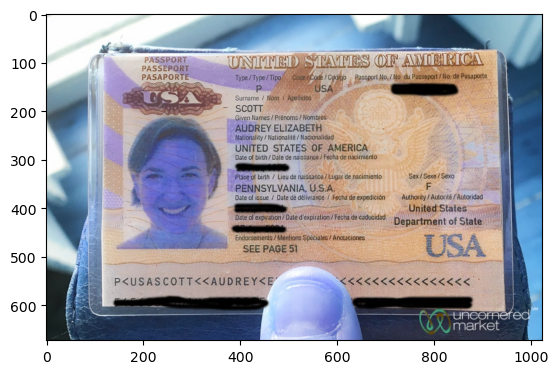

{'name': 'aes de caducidad De eraragnt'}
p28.jpeg


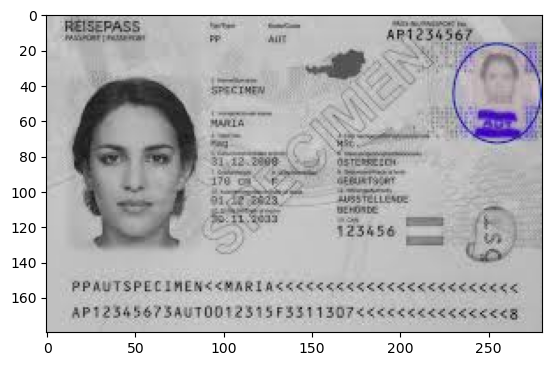

{}
p22.jpg


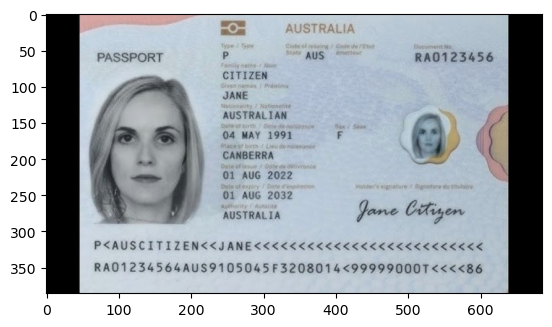

{'dob': '2032'}


In [8]:
process_images('test_images')